<a href="https://colab.research.google.com/github/GBH7/Meachine-Learning/blob/main/DataminingLecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [ ]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data, 1), -10,10)
y = 2*x + 3
noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)
y_noise = y+noise

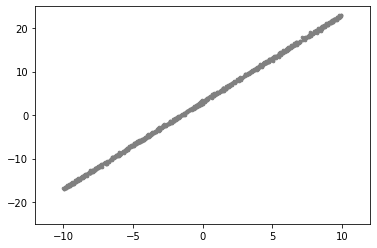

In [ ]:
plt.scatter(x,y_noise,s=7,c="gray")
plt.axis([-12,12,-25,25])
plt.show()

In [ ]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
loss_arr=[]
label = y_noise
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
  loss_arr.append(loss.item())

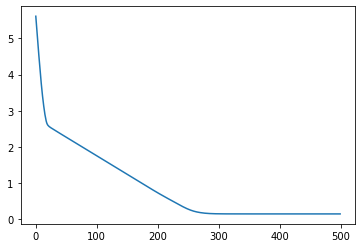

In [ ]:
plt.plot(loss_arr)
plt.show()

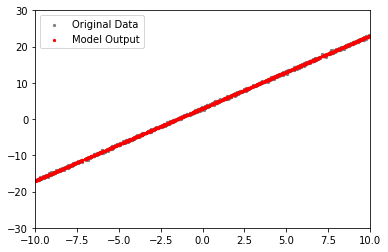

In [ ]:
plt.scatter(x,y_noise,s=5,c="gray",label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red",label="Model Output")
plt.axis([-10,10,-30,30])
plt.legend()
plt.show()

In [ ]:
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias: ",param_list[1].item())

Weight: 2.0009403228759766 
Bias:  3.0063703060150146


In [ ]:
class LinearRegressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1,1)

    def forward(self,x):
      y = self.fc(x)
      return y

In [ ]:
model = LinearRegressor()
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2)+3
y_noise = y + noise

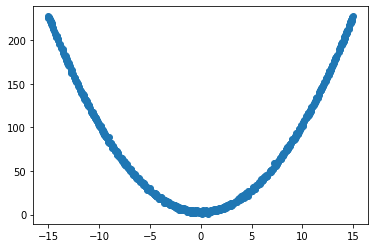

In [ ]:
plt.scatter(x,y_noise)
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

In [ ]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.item())

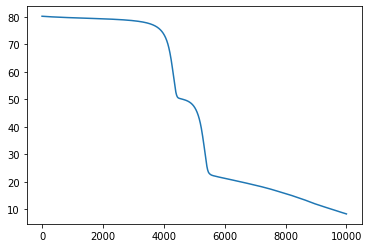

In [ ]:
plt.plot(loss_array)
plt.show()

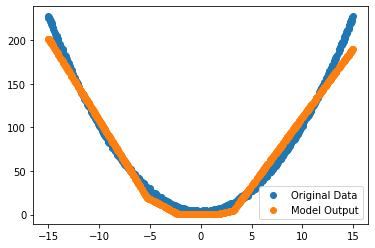

In [ ]:
plt.scatter(x,y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()

In [ ]:
import torch.nn.functional as F
class Regressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,6)
    self.fc2 = nn.Linear(6,10)
    self.fc3 = nn.Linear(10,6)
    self.fc4 = nn.Linear(6,1)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.fc4(x)
      return x

In [ ]:
model = Regressor()
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

In [ ]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()

  loss_array.append(loss.item())

NotImplementedError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [ ]:
mnist_train = dset.MNIST(root="../", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST(root="../", train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [ ]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

torch.Size([256, 1, 28, 28])


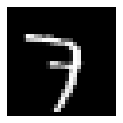

In [ ]:
images, labels = iter(train_loader).next()
print(images.size())

oneshot = images[0][0,:,:]
plt.figure(figsize=(2,2))
plt.imshow(oneshot, cmap='gray')
plt.axis('off')
plt.show()

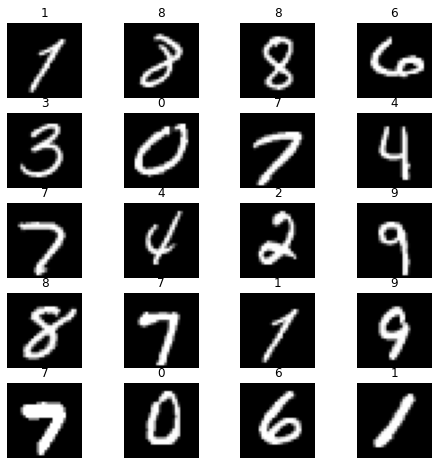

In [ ]:
images, labels = iter(train_loader).next()
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1,columns*rows+1):
  img_xy = np.random.randint(len(images))
  img = images[img_xy][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels[img_xy].item())
  plt.axis('off')
  plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16,kernel_size=5),
        nn.Relu(),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),
        nn.Relu(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )

    def forward(self,x):
      out = self.layer(x)
      out = out.view(batch_size,-1)

      out = self.fc_layer(out)
      return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda:0


AttributeError: ignored

In [ ]:
loss_arr=[]
for i in range(num_epoch):
  for j, [image,label] in enumerate(train_loader):
    x = image.to(device)
    y = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output,y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

NameError: ignored

In [ ]:
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2D(3,64,3),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(64,192,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(192,384,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(384,256,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256,1),
        nn.ReLU(),
        nn.MaxPool2d(2,2))
    self.classifier = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(256*3*3,1024),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,10))
  def forward(self,x):
    x = self.features(x)
    x = x.view(-1,256*3*3)
    x = self.classifier(x)
    return x